comment telecharger a partir de 

https://www.radiofrance.fr/franceinter/podcasts/le-masque-et-la-plume

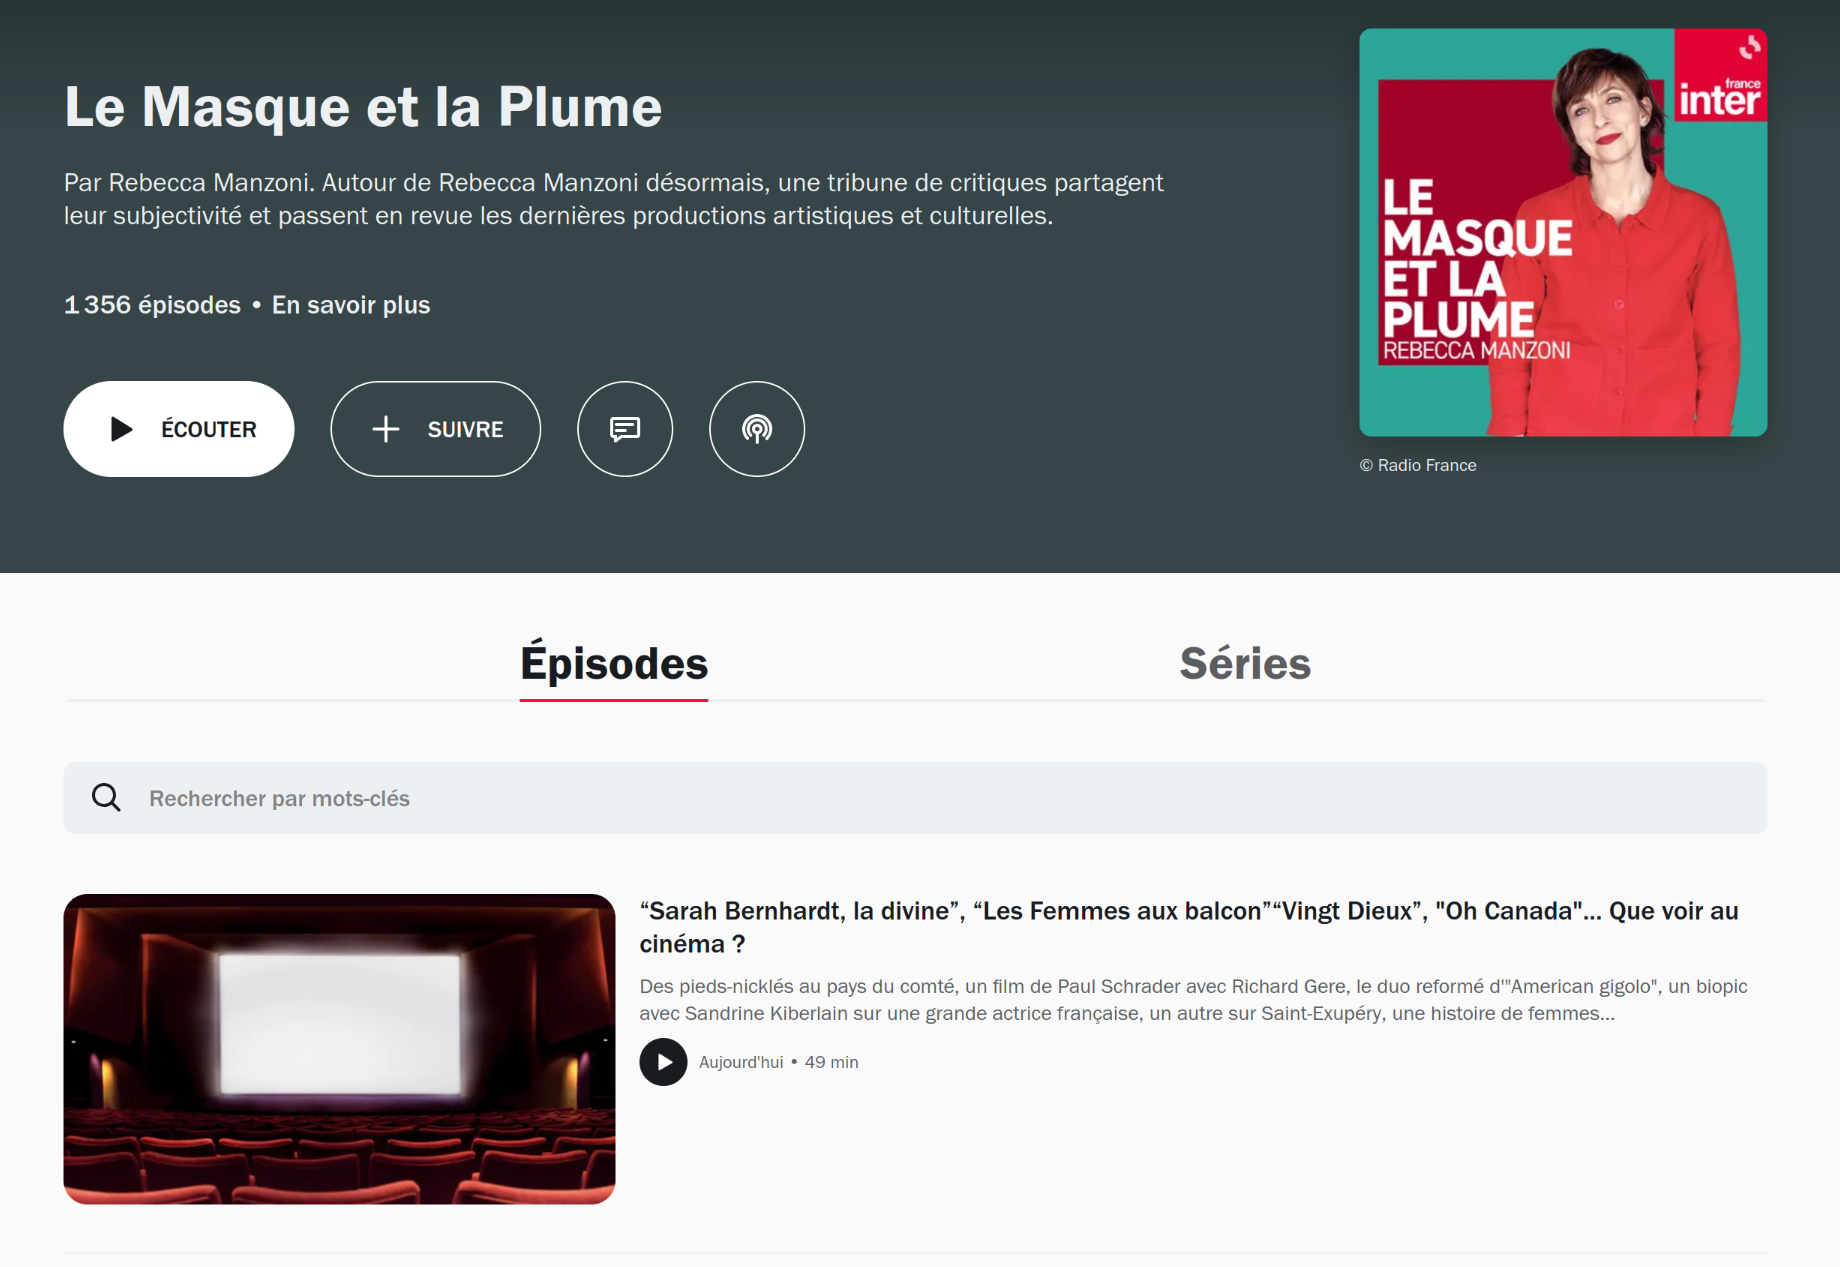

# fichier rss

https://radiofrance-podcast.net/podcast09/rss_14007.xml

In [23]:
import re

def extraire_dureesummary(summary):
    """Extraitune durée au format HH:MM:SS en secondes.
    Returns:
    Le nombre de secondes correspondant à la durée.
    """

    # Expression régulière pour extraire la durée
    pattern_duree = r"durée\s*:\s*(\d{2}:\d{2}:\d{2})"
    
    # Recherche de la durée dans le texte
    match = re.search(pattern_duree, summary)
    
    if match:
        duree_str = match.group(1)
        heures, minutes, secondes = map(int, duree_str.split(':'))
        return heures * 3600 + minutes * 60 + secondes
    else:
        return 0
    
summary = """durée : 00:49:48 - Le Masque et la Plume - par : Rebecca Manzoni - 
Des pieds-nicklés au pays du comté, un film de Paul Schrader avec Richard Gere, 
le duo reformé d'"American gigolo", un biopic avec Sandrine Kiberlain sur une grande 
actrice française, un autre sur Saint-Exupéry, une histoire de femmes... - 
réalisé par : Guillaume Girault"""

extraire_dureesummary(summary)

2988

In [26]:
import feedparser

def extraire_urls_rss(url_flux):
  """Extrait les URLs des balises `enclosure` d'un flux RSS.

  Args:
    url_flux: L'URL du flux RSS.

  Returns:
    Une liste d'URLs.
  """

  flux = feedparser.parse(url_flux)
  urls = []
  for entree in flux.entries:
#      if len(urls) == 0:
#          print(entree)
#          print(entree.summary)
      for link in entree.links:
          if link.type == 'audio/mpeg':
              if extraire_dureesummary(entree.summary) > 900: # 15 minutes
                  urls.append(link.href)
  return urls



url_flux = "https://radiofrance-podcast.net/podcast09/rss_14007.xml"
urls = extraire_urls_rss(url_flux)
urls

['https://rf.proxycast.org/a9ea02c4-09a0-4a95-a86b-269c571baf8a/14007-29.12.2024-ITEMA_23978947-2024F4007S0364-22.mp3',
 'https://rf.proxycast.org/7e653bf4-87a5-42f4-864b-9208e206a295/14007-22.12.2024-ITEMA_23973143-2024F4007S0357-22.mp3',
 'https://rf.proxycast.org/7f3818f7-cc2e-44f5-a5f0-69dde19127b7/14007-15.12.2024-ITEMA_23965603-2024F4007S0350-22.mp3',
 'https://rf.proxycast.org/aeffdd33-8ec9-43f0-8168-09cd6d2ed539/14007-08.12.2024-ITEMA_23954487-2024F4007S0343-22.mp3',
 'https://rf.proxycast.org/7502dbc2-c937-4a70-b60d-c5a89f5b5da4/14007-01.12.2024-ITEMA_23942372-2024F4007S0336-22.mp3',
 'https://rf.proxycast.org/92889ad9-ba53-4510-9b2d-659d5f62b5e9/14007-24.11.2024-ITEMA_23935099-2024F4007S0329-22.mp3',
 'https://rf.proxycast.org/d0d34b20-d05d-417f-b051-b42f1901ad3a/14007-17.11.2024-ITEMA_23927961-2024F4007S0322-22.mp3',
 'https://rf.proxycast.org/f5779476-9d52-4bfb-a839-bf82751eaebb/14007-10.11.2024-ITEMA_23920569-2024F4007S0315-22.mp3',
 'https://rf.proxycast.org/25ab61e5-5852